## Team project:  Student performance analysis

### Import necessary libraries and load data sets to pandas DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Load data for subject "Math".
math = pd.read_csv('student/student-mat.csv', sep=";")
print(math.shape)  # (395, 33)
# add an extra column ['subject] to math DataFrame.
math.insert(1, 'subject', ['math'] * 395)

(395, 33)


In [3]:
# Load data for subject "Portuguese".
portuguese = pd.read_csv('student/student-por.csv', sep=";")
print(portuguese.shape)  # (649, 33)
# add an extra column ['subject] to portuguese dataframe.
portuguese.insert(1, 'subject', ['por'] * 649)

(649, 33)


In [4]:
# Concatenate both DataFrame vertically
students = pd.concat([math, portuguese])
# Check and make sure the concatenation is correct
assert math.shape[0] + portuguese.shape[0] == students.shape[0], 'merge error'
assert math.shape[1] == portuguese.shape[1] == students.shape[1], 'merge error'

### Check the DataFrame

In [5]:
students.shape

(1044, 34)

In [6]:
students.head() # column 'subject' has been inserted. 

,school,subject,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,math,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,GP,math,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,GP,math,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,GP,math,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,GP,math,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
students.info() # No data missing, but some columns data type are object (text), data cleansing needed before ML. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
school        1044 non-null object
subject       1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-nul

In [9]:
# Sort out the all the column names with data type object 
text_columns = []
dataTypeDict = dict(students.dtypes)
for col in dataTypeDict: 
    if dataTypeDict[col] == 'O': 
        text_columns.append(col)
text_columns

['school',
 'subject',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [10]:
# convert all the binary categorical features to integers: (Mjob, Fjob, reason, guardian, needs data-encoding method to convert into numerical data)
students['school'] = students['school'].map({'GP':0, "MS":1})
students['subject'] = students['subject'].map({'math':0, "por":1})
students['sex'] = students['sex'].map({'F':0, "M":1})
students['address'] = students['address'].map({'U':0, "R":1})
students['famsize'] = students['famsize'].map({'GT3':0, "LE3":1})
students['Pstatus'] = students['Pstatus'].map({'A':0, "T":1})
students['schoolsup'] = students['schoolsup'].map({'no':0, "yes":1})
students['famsup'] = students['famsup'].map({'no':0, "yes":1})
students['paid'] = students['paid'].map({'no':0, "yes":1})
students['activities'] = students['activities'].map({'no':0, "yes":1})
students['nursery'] = students['nursery'].map({'no':0, "yes":1})
students['higher'] = students['higher'].map({'no':0, "yes":1})
students['internet'] = students['internet'].map({'no':0, "yes":1})
students['romantic'] = students['romantic'].map({'no':0, "yes":1})
# Recheck the dtypes
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
school        1044 non-null int64
subject       1044 non-null int64
sex           1044 non-null int64
age           1044 non-null int64
address       1044 non-null int64
famsize       1044 non-null int64
Pstatus       1044 non-null int64
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null int64
famsup        1044 non-null int64
paid          1044 non-null int64
activities    1044 non-null int64
nursery       1044 non-null int64
higher        1044 non-null int64
internet      1044 non-null int64
romantic      1044 non-null int64
famrel        1044 non-null int64
freetime      1044 non-null int64
goout 

### Data visualization 

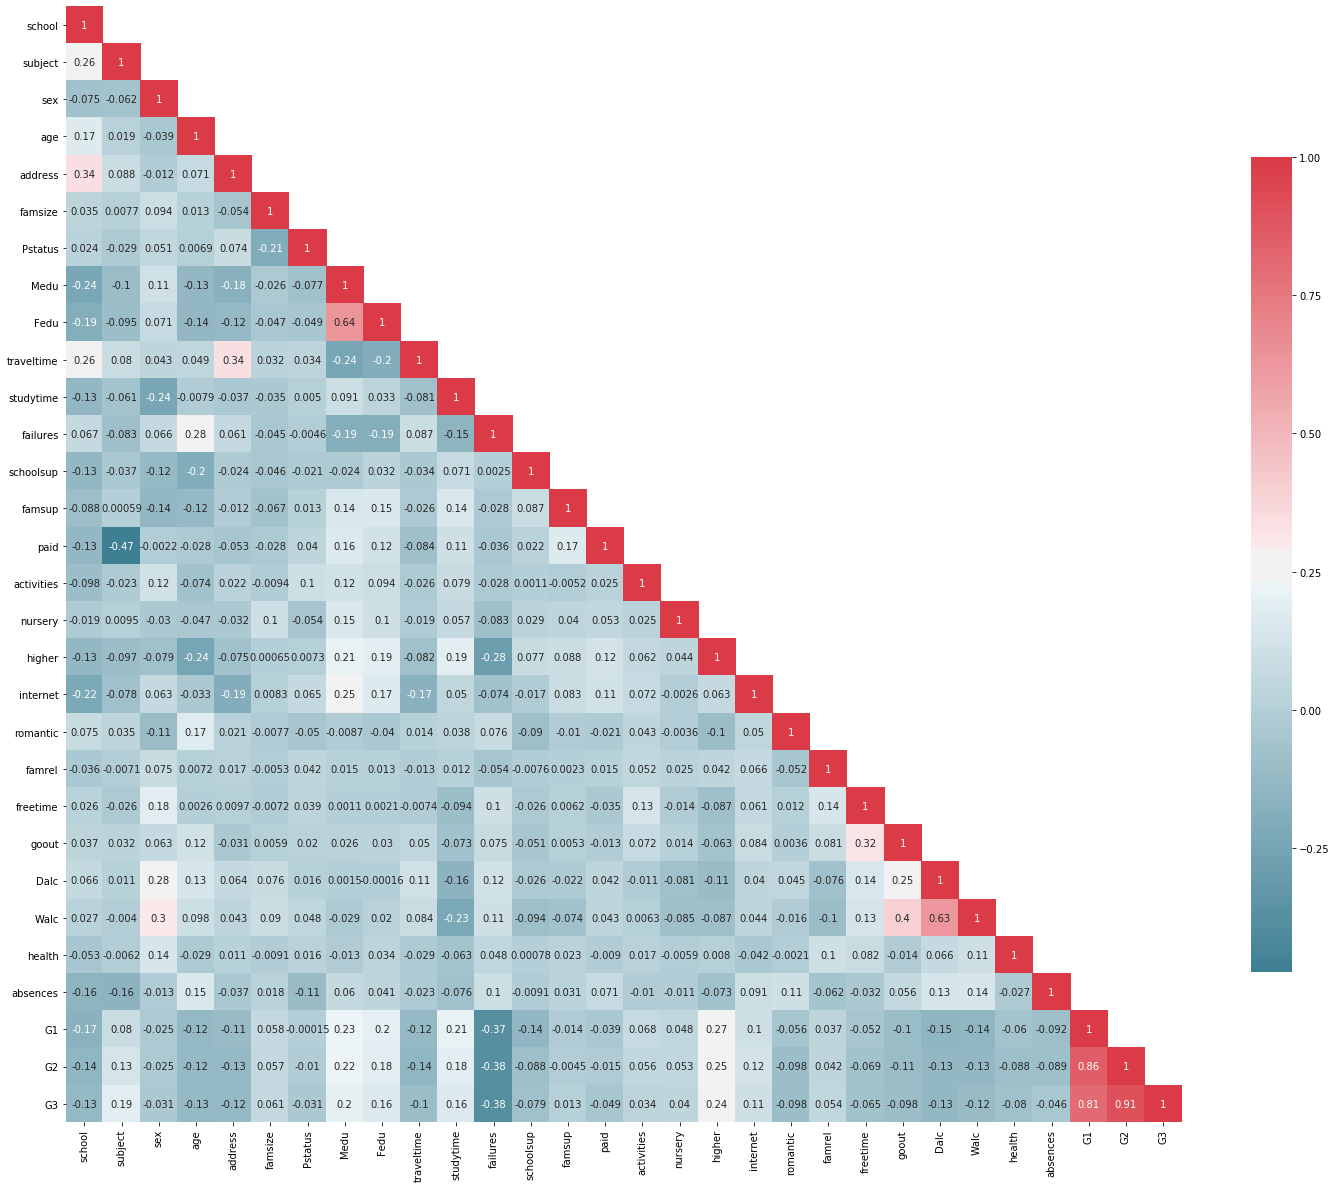

In [11]:
# Plotting the heatmap (missing Mjob, Fjob, reason, guardian)
fig, ax = plt.subplots(figsize=(25, 25))                  

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )  # color map

# Numpy’s tril() function to extract Lower Triangle Matrix
df_lt = students.corr().where(np.tril(np.ones(students.corr().shape)).astype(np.bool))

# plotting the heatmap 
sns.heatmap(data      = df_lt, 
            cmap      = cmap, 
            square    = True, 
            cbar_kws  = {'shrink': .6}, 
            annot     = True, 
            annot_kws = {'fontsize': 10},
            ax        = ax
           )
plt.show()


### Interesting findings of Heatmap: 
1. G1 and G2 and failures are the most 3 related features to final grade G3. 
2. Mother's education is very much related with father's education. 
3. Beside the G1 and G2 and failures, we can see the other Top10 influence factors to target G3 are: higher:0.24, Medu:0.2, Fedu:0.16, studytime:0.16, age:-0.13, Dalc:-0.13, address:-0.12, Walc: -0.12, internet:0.11, traveltime: -0.1.
4. walc and goout has high relation. 
5. traveltime and address has high relation. 
6. paid and subject has high negtive relation. 
7. Internet has a positive relation to target G3. 
8. sex, Pstatus, schoolsup, famsup, paid, nursery, romantic, famrel, health, absences (These factors are surpriseingly showing us the grade is not much related to them, which is contrary to our usual perception: family support, school support or extra classes paid should greatly help to improve grades but not as hoped. However, as we usually worried Early school love, poor health and often absences must affect grades but they do not really lead to a decline in grades. 

`So let's visualize these findings by plotting them :)`

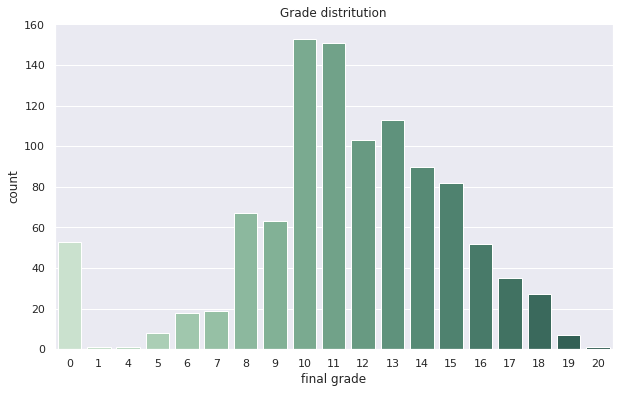

In [12]:
# countplot to review G3 distritution 

plt.figure(figsize=(10, 6))
sns.set()
sns.countplot('G3', data=students, palette=("ch:2.5,-.2,dark=.3"))
plt.title('Grade distritution')
plt.xlabel('final grade')
plt.show()

Above plot shows that the grades of the students conform to the normal distribution. However there are a bit too much the students whose grade is only 0. It might be because of cheating when doing exam. We think the students whose grade is 0 should be removed. 

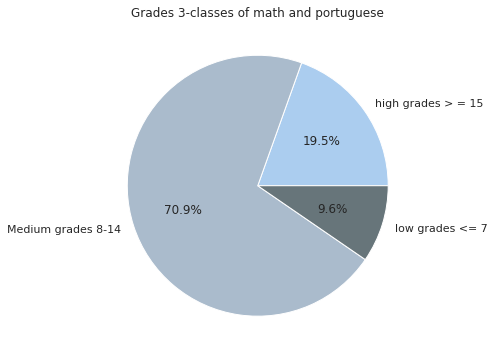

In [13]:
# let's class our grades (high:>=15, mid:8-14, low:<=7)
high = students.loc[students['G3'] >= 15].count()[0]
medium = students.loc[(students['G3'] >= 8) & (students['G3'] <=14)].count()[0]
low = students.loc[students['G3'] <= 7].count()[0]

# pieplot
plt.figure(figsize=(10, 6))
labels = ['high grades > = 15', 'Medium grades 8-14', 'low grades <= 7']
colors = ['#abcdef', '#aabbcc', '#67757a']
plt.pie([high,medium,low], labels=labels, colors=colors, autopct='%1.1f%%', shadow=False)
plt.title('Grades 3-classes of math and portuguese')
plt.show()

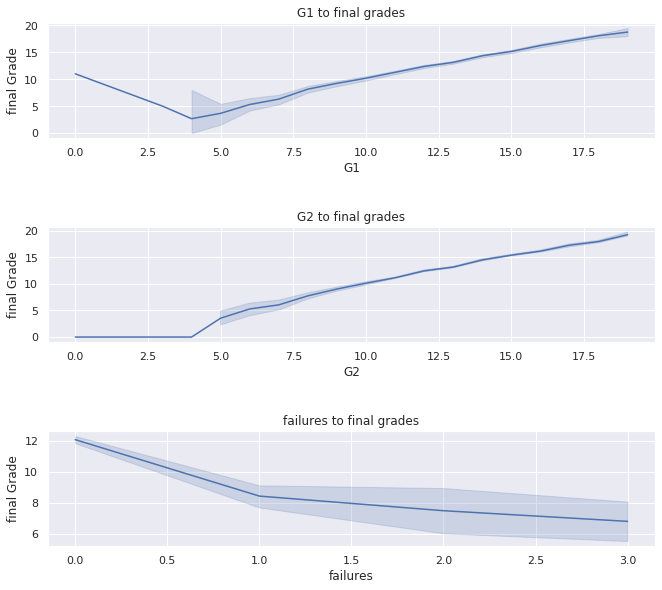

In [14]:
# lineplot on G1/G2/failures to G3 

fig, ax = plt.subplots(3,1,figsize=(10, 9))
sns.set()
index = 0
for col in ['G1', 'G2', 'failures']: 
    sns.lineplot(col, 'G3', data=students, ax=ax[index])
    ax[index].set_title(col + ' to final grades')
    ax[index].set_xlabel(col)
    ax[index].set_ylabel('final Grade')
    index+=1 
fig.tight_layout(pad=3.0)

These 3 plottings demostrate that: Students' academic performance continues to be stable. 
It means students with good results will continue to perform well and vice versa. 

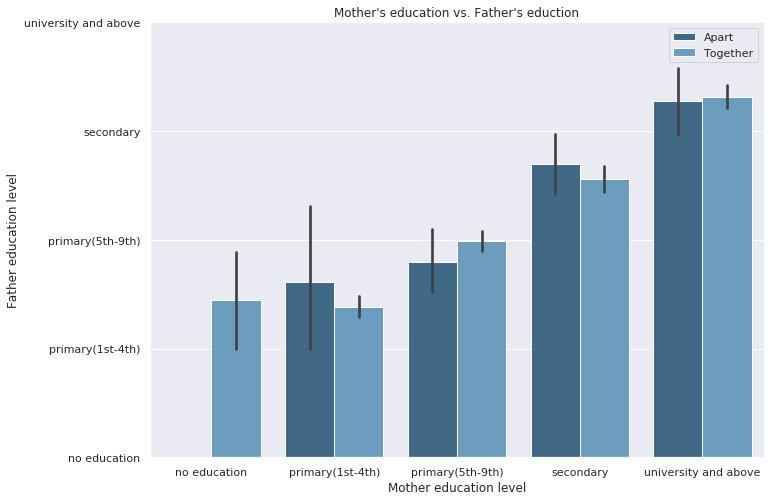

In [15]:
# barplot for Medu and Fedu
new_Pstatus = []
for each_status in students['Pstatus']: 
    if each_status == 0: 
        new_Pstatus.append('Apart')
    else: 
        new_Pstatus.append('Together')
students['NPstatus'] = new_Pstatus
        
plt.figure(figsize=(11, 8))
sns.set()
labels=['Apart', 'Together']
sns.barplot('Medu', 'Fedu', hue='NPstatus', data=students, palette=("Blues_d"))

plt.title("Mother's education vs. Father's eduction")
plt.xlabel('Mother education level')
plt.ylabel('Father education level')
plt.xticks(np.arange(5), ('no education', 'primary(1st-4th)', 'primary(5th-9th)', 'secondary', 'university and above'))
plt.yticks(np.arange(5), ('no education', 'primary(1st-4th)', 'primary(5th-9th)', 'secondary', 'university and above'))
plt.legend()
plt.show()


This plot shows that people prefer to marry similar education background person, it might because they have more interests in common. And the devoice rate is almost 50% high in each group. The no education group has very small sample, not representative. 

Text(0.5, 1.0, 'Studytime on final grade')

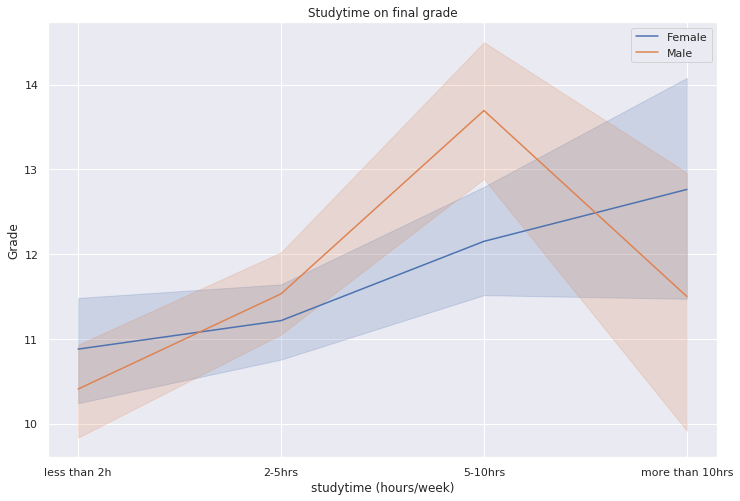

In [16]:
# Lineplot 
sorted_by_studytime_df = students.sort_values('studytime')
plt.figure(figsize=(12, 8))
sns.set()
sns.lineplot('studytime', 'G3', hue='sex', data=sorted_by_studytime_df)
plt.xlabel('studytime (hours/week)')
plt.ylabel('Grade')
plt.xticks([1,2,3,4], ('less than 2h', '2-5hrs', '5-10hrs', 'more than 10hrs'))
plt.legend(labels=['Female', 'Male'])
plt.title('Studytime on final grade')

From above plot, it shows that for female students, the more studytime spent, the better the grade is. However for male students, the grade is increasing with the studytime, but when the total weekly studytime is over than 10hs, their grades are declining. 

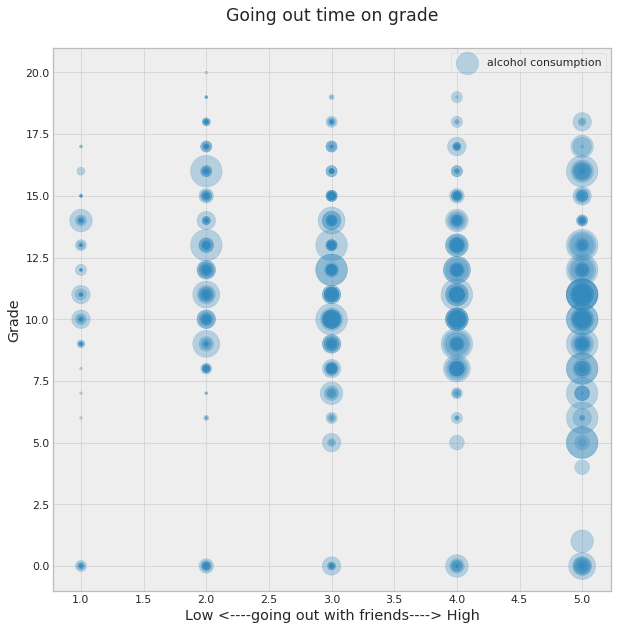

In [17]:
# Scatter plot 
plt.style.use("bmh")
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
s = (students['Walc'] + students['Dalc']) ** 3
axes.scatter(students['goout'], students['G3'], alpha=0.3, s=s, label='alcohol consumption')

axes.set_xlabel('Low <----going out with friends----> High')
axes.set_ylabel('Grade')
axes.set_title('Going out time on grade\n')
axes.legend()
plt.show()

From this plot we can see that the students who go out rarely has the minimal fluctuations in grades but not the best grade group. The best group is going out on low level but still spend sometime with friends.

And all the groups the top grade students almost no alcohol consumption or at a lower level. With the frequency of going out creasing, the alcohol assumption is increasing too. 

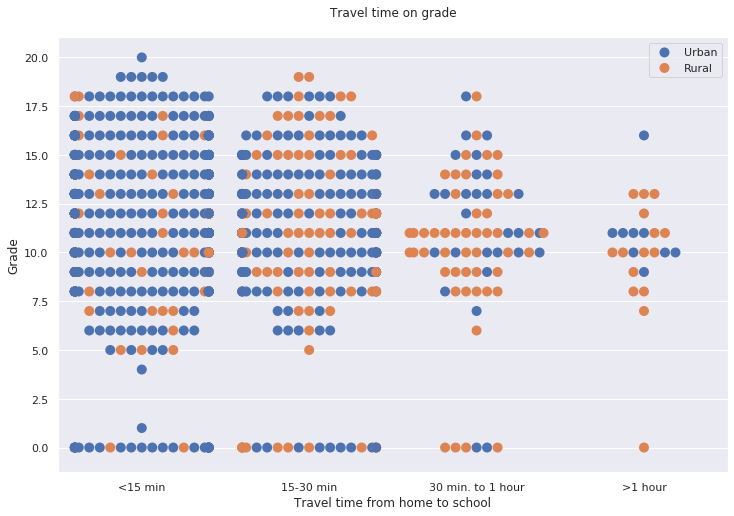

In [18]:
# swarmplot plot 
sns.set()
plt.figure(figsize=(12, 8))
sns.swarmplot('traveltime', 'G3', data=students, hue='address', size=10)

plt.xlabel('Travel time from home to school')
plt.ylabel('Grade')
plt.xticks([0,1,2,3], ('<15 min', '15-30 min', '30 min. to 1 hour', '>1 hour'))

plt.title('Travel time on grade\n')
plt.legend(labels=['Urban', 'Rural'])
plt.show()

From this plot we can see that the students who spent more time on the way to school have lower grades. And most of the students live near school and students who live in Rural are normally have more travel time than students live in Urban. 

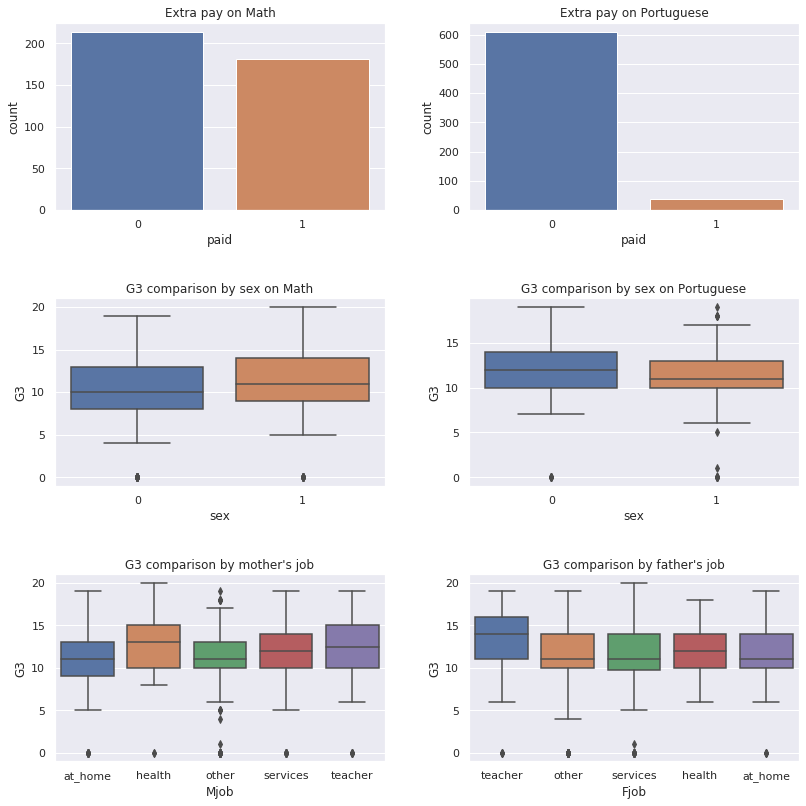

In [19]:
# comparisons

fig, ax = plt.subplots(3,2,figsize=(12, 12))
sns.set()

# First row of subplots 
# Compare the percentage of extra pay on Math and Portuguese
sns.countplot('paid', data=students.loc[students['subject']==0], ax=ax[0][0])
ax[0][0].set_title('Extra pay on Math') 
sns.countplot('paid', data=students.loc[students['subject']==1], ax=ax[0][1])
ax[0][1].set_title('Extra pay on Portuguese')


# Second row of subplots
# Compare Female and Male students performance on each subject
sns.boxplot('sex', 'G3', data=students.loc[students['subject']==0], ax=ax[1][0])
ax[1][0].set_title('G3 comparison by sex on Math') 
sns.boxplot('sex', 'G3', data=students.loc[students['subject']==1], ax=ax[1][1])
ax[1][1].set_title('G3 comparison by sex on Portuguese') 

# Third row of subplots
# Compare Mother's job and Father's job to students grade
sns.boxplot('Mjob', 'G3', data=students, ax=ax[2][0])
ax[2][0].set_title("G3 comparison by mother's job") 
sns.boxplot('Fjob', 'G3', data=students, ax=ax[2][1])
ax[2][1].set_title("G3 comparison by father's job") 


fig.tight_layout(pad=3.0)

plt.show()



Above plotttings show: 
1. For extra classes, parents paid more on Math and very little paid on Portuguese. 
2. Male students have higher performance on Math and Female students have higher performance on Portuguese. 
3. Mother's job is health related, their kids have best performance and Father's job is teacher related, their kids has best performance. 

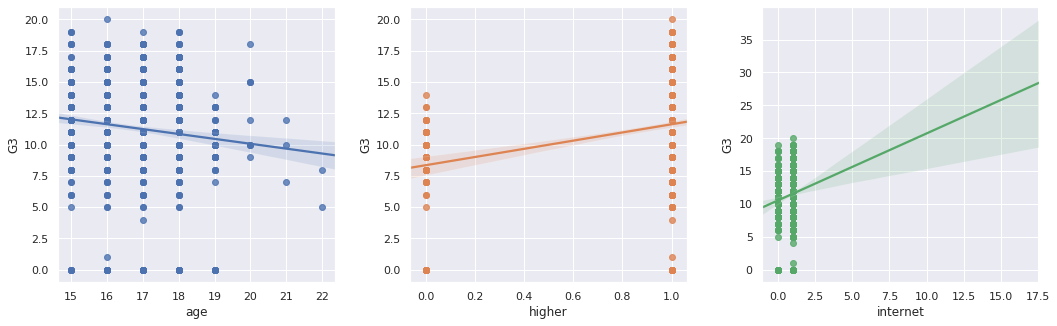

In [20]:
# Regplots to see other three features to final grade (Age/students willing to learn/internet availability)

fig, (axis1, axis2, axis3)  = plt.subplots(1, 3,figsize=(15,5))
sns.regplot(x='age', y='G3', data=students, ax=axis1)
sns.regplot(x='higher', y='G3', data=students, ax=axis2)
sns.regplot(x='internet', y='G3', data=students, ax=axis3)

fig.tight_layout(pad=2.0)


Above 3 plots show: 
1. The grade is decline with the age increasing. This is according with our normal recgonition. The highter the grade, the knowledge is more difficult. 
2. Students who want to take higher education get the better study performance. 
3. Internet doesn't affect learning, it helps with academic performance. 

### Data cleansing

In [21]:
"""
Since there are still 4 features dtype are objects, so we have to convert them to numerical data type. 
Because there is no ordinal relationship for each features, so we have dummy variables encoding method 
in pandas to convert categorical data to numerical data. 
"""

# use pd.concat to join the new columns with original students dataframe and drop the original 'Mjob' column 
students = pd.concat([students,pd.get_dummies(students['Mjob'], prefix='Mjob',drop_first=True)],axis=1).drop(['Mjob'],axis=1)
# use pd.concat to join the new columns with students dataframe and drop the original 'Fjob' column 
students = pd.concat([students,pd.get_dummies(students['Fjob'], prefix='Fjob',drop_first=True)],axis=1).drop(['Fjob'],axis=1)
# use pd.concat to join the new columns with students dataframe and drop the original 'reason' column 
students = pd.concat([students,pd.get_dummies(students['reason'], prefix='reason',drop_first=True)],axis=1).drop(['reason'],axis=1)
# use pd.concat to join the new columns with students dataframe and drop the original 'guardian' column 
students = pd.concat([students,pd.get_dummies(students['guardian'], prefix='guardian',drop_first=True)],axis=1).drop(['guardian'],axis=1)


In [22]:
# Check one-hot-encoding is applied correctly. 
students.columns

Index(['school', 'subject', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3', 'NPstatus', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other'],
      dtype='object')

In [23]:
# need to remove 'NPstatus' - added for plotting purpose only 
students.drop(['NPstatus'], axis=1, inplace=True)
students.columns
students.shape

(1044, 43)

In [24]:
# need remove students sample whose G3 is 0 
students = students.loc[students['G3'] != 0]
students.shape

(991, 43)

In [25]:
students.info() # Data cleansing is done. No data missing and all the sample dtype are numerical. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 648
Data columns (total 43 columns):
school               991 non-null int64
subject              991 non-null int64
sex                  991 non-null int64
age                  991 non-null int64
address              991 non-null int64
famsize              991 non-null int64
Pstatus              991 non-null int64
Medu                 991 non-null int64
Fedu                 991 non-null int64
traveltime           991 non-null int64
studytime            991 non-null int64
failures             991 non-null int64
schoolsup            991 non-null int64
famsup               991 non-null int64
paid                 991 non-null int64
activities           991 non-null int64
nursery              991 non-null int64
higher               991 non-null int64
internet             991 non-null int64
romantic             991 non-null int64
famrel               991 non-null int64
freetime             991 non-null int64
goout          

## Machine Learning 
## 1. Predict students final grade (Regression) 
We’re going to build up a model to estimate students final scores for two two subjects (Math and Portugues) from various features of the student. The scores produced are numbers between 0 and 20, where higher scores indicate better study performance.

### Data preparation (training data & test data) 

In [26]:
# Separating features(X) and target(y)
# X: keep all the features only exclude final grade 'G3'

X = students.drop('G3', axis=1)
y = students['G3']

# Splitting features and target datasets into: train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35) 


### Estimators comparison 

In [27]:
# Training a model using multiple differents algorithms and comparing the results
# Cross-validation to get each estimator score
for Model in [LinearRegression, LinearSVR, Ridge, ElasticNet, Lasso, GradientBoostingRegressor]:
    model = Model()
    model.fit(X_train, y_train)
    predicted_values = model.predict(X_test)
    print(f"{Model.__name__, cross_val_score(Model(), X, y).mean()}")
    print(f"MAE error(avg abs residual): {metrics.mean_absolute_error(y_test, predicted_values)}")
    print(f"MSE error: {metrics.mean_squared_error(y_test, predicted_values)}")
    print(f"RMSE error: {np.sqrt(metrics.mean_squared_error(y_test, predicted_values))}")
    print(f"R2 Score: {metrics.r2_score(y_test, predicted_values)}\n")
    

('LinearRegression', 0.8764438956368696)
MAE error(avg abs residual): 0.6693484854434684
MSE error: 0.9596090892581364
RMSE error: 0.979596390998934
R2 Score: 0.8809198934488663

('LinearSVR', 0.8735180642153489)
MAE error(avg abs residual): 0.6447732592948799
MSE error: 0.9407712498923467
RMSE error: 0.9699336316946365
R2 Score: 0.8832575244112882

('Ridge', 0.8776261421916843)
MAE error(avg abs residual): 0.6692004925429009
MSE error: 0.959176521049078
RMSE error: 0.9793755771148666
R2 Score: 0.880973571836245

('ElasticNet', 0.8786221200331273)
MAE error(avg abs residual): 0.7042041635786985
MSE error: 1.0642580527351175
RMSE error: 1.0316288347730096
R2 Score: 0.8679337620534889

('Lasso', 0.8749467617072778)
MAE error(avg abs residual): 0.7122504163973283
MSE error: 1.0814764154453549
RMSE error: 1.0399405826514103
R2 Score: 0.8657970956868164

('GradientBoostingRegressor', 0.875776291634097)
MAE error(avg abs residual): 0.6589007795938214
MSE error: 0.9526400157941531
RMSE error:

==> Based on the cross-validation score, we would choose Gradient Boosting Regressor as our predict estimator. 

### Ensemble Decision Tree - Gradient Boosting Regressor 
 

Ref: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

In [28]:
# Tuning the hyper-parameter 

param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 

n_jobs=4

def GradientBooster(param_grid, n_jobs):
    estimator = GradientBoostingRegressor() 
    classifier = GridSearchCV(estimator=estimator, cv=5, param_grid=param_grid, 
    n_jobs=n_jobs)
    classifier.fit(X_train, y_train)
    print(classifier.best_estimator_)
    
GradientBooster(param_grid, n_jobs)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


Printing MAE error(avg abs residual): 0.6617471620809003
Printing MSE error: 0.9645153888620099
Printing RMSE error: 0.9820974436694202
R2 Score: 0.8803110594078583


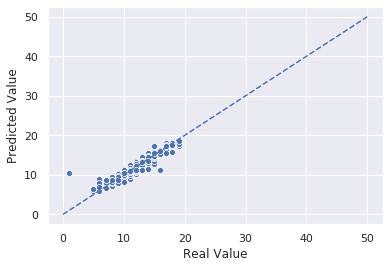

In [29]:
# Train GBR with optimized parameters  

clf = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

clf.fit(X_train, y_train)

# Predicting the results for our test dataset
predicted_values = clf.predict(X_test)

print(f"Printing MAE error(avg abs residual): {metrics.mean_absolute_error(y_test, predicted_values)}")
print(f"Printing MSE error: {metrics.mean_squared_error(y_test, predicted_values)}")
print(f"Printing RMSE error: {np.sqrt(metrics.mean_squared_error(y_test, predicted_values))}")
print(f"R2 Score: {metrics.r2_score(y_test, predicted_values)}")

# Plotting differenct between real and predicted values
sns.scatterplot(y_test, predicted_values)
plt.plot([0, 50], [0, 50], '--')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.show()


Text(0, 0.5, 'Deviance')

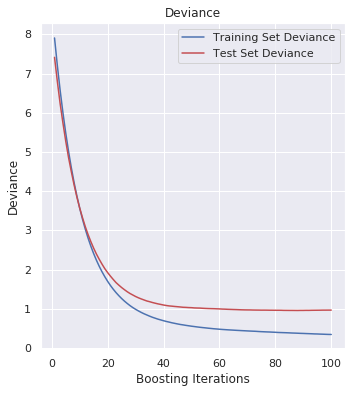

In [30]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((100,), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(100) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(100) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


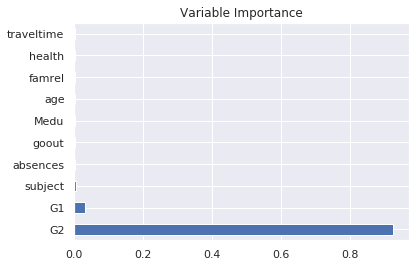

In [31]:
# Plot feature importance
(pd.Series(clf.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 

plt.title('Variable Importance')
plt.show()

==> From variable importance plotting, we can see G2 affect prediction greatly. 
### Therefore, we are going to remove  `G2` from the X and see how the model performance is. 

In [32]:
# Separating features(X) and target(y)

X = students.drop(['G3', 'G2'], axis=1)
y = students['G3']

In [33]:
# Splitting features and target datasets into: train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# Printing original Dataset
print(f"X.shape: {X.shape}, y.shape: {y.shape}")

# Printing splitted datasets
print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

X.shape: (991, 41), y.shape: (991,)
X_train.shape: (644, 41), y_train.shape: (644,)
X_test.shape: (347, 41), y_test.shape: (347,)


In [34]:
# Training a model using multiple differents algorithms and comparing the results
# Cross-validation to get each estimator score

for Model in [LinearRegression, LinearSVR, Ridge, ElasticNet, Lasso, GradientBoostingRegressor]:
    model = Model()
    model.fit(X_train, y_train)
    predicted_values = model.predict(X_test)
    print(f"{Model.__name__, cross_val_score(Model(), X, y).mean()}")
    print(f"MAE error(avg abs residual): {metrics.mean_absolute_error(y_test, predicted_values)}")
    print(f"MSE error: {metrics.mean_squared_error(y_test, predicted_values)}")
    print(f"RMSE error: {np.sqrt(metrics.mean_squared_error(y_test, predicted_values))}")
    print(f"R2 Score: {metrics.r2_score(y_test, predicted_values)}\n")
 

('LinearRegression', 0.6147886269596488)
MAE error(avg abs residual): 1.09736044284473
MSE error: 2.0810056554986867
RMSE error: 1.4425691163679772
R2 Score: 0.7459425214209541

('LinearSVR', 0.6755340082889193)
MAE error(avg abs residual): 1.1038134782218192
MSE error: 2.155328747305292
RMSE error: 1.4681037930968273
R2 Score: 0.7368688616475212

('Ridge', 0.6228337580225892)
MAE error(avg abs residual): 1.096502573802226
MSE error: 2.077647158795941
RMSE error: 1.4414045784567013
R2 Score: 0.746352540106805

('ElasticNet', 0.7386939458165823)
MAE error(avg abs residual): 1.1428122577103734
MSE error: 2.2111683975033185
RMSE error: 1.4869997974119964
R2 Score: 0.7300517342185007

('Lasso', 0.7316273603244579)
MAE error(avg abs residual): 1.155573120741402
MSE error: 2.249545181612079
RMSE error: 1.4998483862084457
R2 Score: 0.7253665431999747

('GradientBoostingRegressor', 0.6848011890139608)
MAE error(avg abs residual): 1.0585607302453008
MSE error: 1.9990966999976827
RMSE error: 1.4

Without these 3 features: grades G1 & G2 & failures, the Estimator scores are decline dramastically. 
### Compare with others, Ensemble Decision Tree - `Gradient Boosting Regressor` is still the best estimator to choose. 

In [35]:
# Tuning the hyper-parameter 

param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 

n_jobs=4

def GradientBooster(param_grid, n_jobs):
    estimator = GradientBoostingRegressor() 
    classifier = GridSearchCV(estimator=estimator, cv=5, param_grid=param_grid, 
    n_jobs=n_jobs)
    classifier.fit(X_train, y_train)
    print(classifier.best_estimator_)
    
GradientBooster(param_grid, n_jobs)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


Printing MAE error(avg abs residual): 1.0908181961988133
Printing MSE error: 2.0839596048892477
Printing RMSE error: 1.4435926035032347
R2 Score: 0.7455818914860796


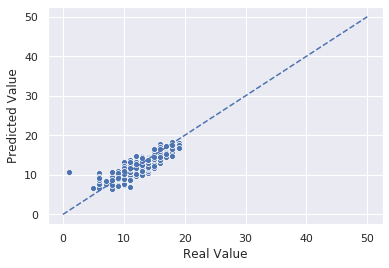

In [36]:
# train GBR with parameters optimized 

clf = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

clf.fit(X_train, y_train)

# Predicting the results for our test dataset
predicted_values = clf.predict(X_test)

print(f"Printing MAE error(avg abs residual): {metrics.mean_absolute_error(y_test, predicted_values)}")
print(f"Printing MSE error: {metrics.mean_squared_error(y_test, predicted_values)}")
print(f"Printing RMSE error: {np.sqrt(metrics.mean_squared_error(y_test, predicted_values))}")
print(f"R2 Score: {metrics.r2_score(y_test, predicted_values)}")

# Plotting differenct between real and predicted values
sns.scatterplot(y_test, predicted_values)
plt.plot([0, 50], [0, 50], '--')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.show()

Text(0, 0.5, 'Deviance')

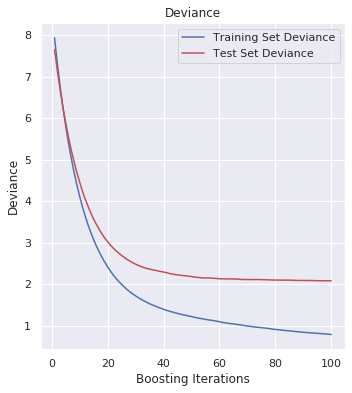

In [37]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((100,), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(100) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(100) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

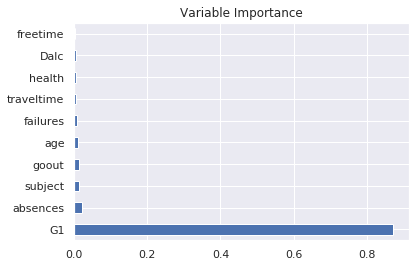

In [38]:
# Plot feature importance
(pd.Series(clf.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 

plt.title('Variable Importance')
plt.show()

==> The performance of model is decline but still showing G1 has strong effect size to final grade. We are going to remove G2 to see how the model will perform. 
### Therefore, we are going to remove  `G1 & G2` from the X and see how the model performance is. 

In [39]:
# Separating features(X) and target(y)
X = students.drop(['G1', 'G2', 'G3'], axis=1)
y = students['G3']

# Splitting features and target datasets into: train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# Printing original Dataset
print(f"X.shape: {X.shape}, y.shape: {y.shape}")

# Printing splitted datasets
print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

X.shape: (991, 40), y.shape: (991,)
X_train.shape: (644, 40), y_train.shape: (644,)
X_test.shape: (347, 40), y_test.shape: (347,)


In [40]:
# Training a model using multiple differents algorithms and comparing the results
# Cross-validation to get each estimator score

for Model in [LinearRegression, LinearSVR, Ridge, ElasticNet, Lasso, GradientBoostingRegressor]:
    model = Model()
    model.fit(X_train, y_train)
    predicted_values = model.predict(X_test)
    print(f"{Model.__name__, cross_val_score(Model(), X, y).mean()}")
    print(f"MAE error(avg abs residual): {metrics.mean_absolute_error(y_test, predicted_values)}")
    print(f"MSE error: {metrics.mean_squared_error(y_test, predicted_values)}")
    print(f"RMSE error: {np.sqrt(metrics.mean_squared_error(y_test, predicted_values))}")
    print(f"R2 Score: {metrics.r2_score(y_test, predicted_values)}\n")
 

('LinearRegression', 0.14427652307261649)
MAE error(avg abs residual): 2.0601178413711603
MSE error: 6.646572392597164
RMSE error: 2.5780947214167993
R2 Score: 0.22194976966862734

('LinearSVR', 0.14888676923774088)
MAE error(avg abs residual): 2.0999545504915704
MSE error: 6.966982864927975
RMSE error: 2.6395042839381744
R2 Score: 0.18444240089683261

('Ridge', 0.1519208113056523)
MAE error(avg abs residual): 2.0557166004378353
MSE error: 6.62139790632825
RMSE error: 2.573207707575945
R2 Score: 0.22489670437166587

('ElasticNet', 0.07222369284366066)
MAE error(avg abs residual): 2.29050231080181
MSE error: 7.894340144148174
RMSE error: 2.8096868409394267
R2 Score: 0.07588561371726643

('Lasso', 0.03447370576932459)
MAE error(avg abs residual): 2.3299004577009534
MSE error: 8.170159816187354
RMSE error: 2.8583491417577656
R2 Score: 0.04359806057197502

('GradientBoostingRegressor', 0.2512480901534755)
MAE error(avg abs residual): 1.986903758775234
MSE error: 6.237919243736248
RMSE erro

In [41]:
# Tuning the hyper-parameter 

param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 

n_jobs=4

def GradientBooster(param_grid, n_jobs):
    estimator = GradientBoostingRegressor() 
    classifier = GridSearchCV(estimator=estimator, cv=5, param_grid=param_grid, 
    n_jobs=n_jobs)
    classifier.fit(X_train, y_train)
    print(classifier.best_estimator_)
    
GradientBooster(param_grid, n_jobs)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


Printing MAE error(avg abs residual): 1.9668175272511033
Printing MSE error: 6.1816581638805355
Printing RMSE error: 2.4862940622300767
R2 Score: 0.276372801777657


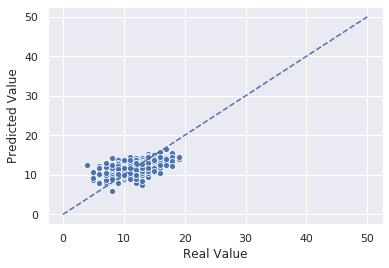

In [42]:
# train GBR with parameters optimized 

clf = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

clf.fit(X_train, y_train)

# Predicting the results for our test dataset
predicted_values = clf.predict(X_test)

print(f"Printing MAE error(avg abs residual): {metrics.mean_absolute_error(y_test, predicted_values)}")
print(f"Printing MSE error: {metrics.mean_squared_error(y_test, predicted_values)}")
print(f"Printing RMSE error: {np.sqrt(metrics.mean_squared_error(y_test, predicted_values))}")
print(f"R2 Score: {metrics.r2_score(y_test, predicted_values)}")

# Plotting differenct between real and predicted values
sns.scatterplot(y_test, predicted_values)
plt.plot([0, 50], [0, 50], '--')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.show()

Text(0, 0.5, 'Deviance')

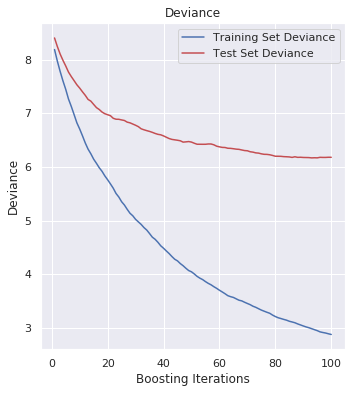

In [43]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((100,), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(100) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(100) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

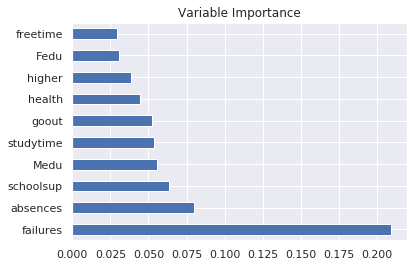

In [44]:
# Plot feature importance
(pd.Series(clf.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 

plt.title('Variable Importance')
plt.show()

==> After removing "G1'and 'G2' grade related features, the model predictive performance is dramatically down. We can see all the other features are not really effect students final grade too much. This is the same insight we got from plottings. In order to see more clearly, we are going to remove all the features only leave 'G1' and 'G2' as X. 

### Therefore, we are going to check the effection of `G1` and `G2` to the model performance. 

In [45]:
# Separating features(X) and target(y)
X = students[['G1', 'G2']]
y = students['G3']

# Splitting features and target datasets into: train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# Printing original Dataset
print(f"X.shape: {X.shape}, y.shape: {y.shape}")

# Printing splitted datasets
print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

X.shape: (991, 2), y.shape: (991,)
X_train.shape: (644, 2), y_train.shape: (644,)
X_test.shape: (347, 2), y_test.shape: (347,)


In [46]:
# Training a model using multiple differents algorithms and comparing the results
# Cross-validation to get each estimator score

for Model in [LinearRegression, LinearSVR, Ridge, ElasticNet, Lasso, GradientBoostingRegressor]:
    model = Model()
    model.fit(X_train, y_train)
    predicted_values = model.predict(X_test)
    print(f"{Model.__name__, cross_val_score(Model(), X, y).mean()}")
    print(f"MAE error(avg abs residual): {metrics.mean_absolute_error(y_test, predicted_values)}")
    print(f"MSE error: {metrics.mean_squared_error(y_test, predicted_values)}")
    print(f"RMSE error: {np.sqrt(metrics.mean_squared_error(y_test, predicted_values))}")
    print(f"R2 Score: {metrics.r2_score(y_test, predicted_values)}\n")
 

('LinearRegression', 0.8907983395593823)
MAE error(avg abs residual): 0.6570887521983131
MSE error: 0.7058512504521175
RMSE error: 0.8401495405296117
R2 Score: 0.9166851189318773

('LinearSVR', 0.8765628652768429)
MAE error(avg abs residual): 0.6529362058786189
MSE error: 0.9039170236108531
RMSE error: 0.9507455093824283
R2 Score: 0.893306501519475

('Ridge', 0.8907953870387163)
MAE error(avg abs residual): 0.6569593090676534
MSE error: 0.7057498358829712
RMSE error: 0.840089183291257
R2 Score: 0.91669708936157

('ElasticNet', 0.8782052089259661)
MAE error(avg abs residual): 0.6861753882219095
MSE error: 0.7728703206074136
RMSE error: 0.8791304343539778
R2 Score: 0.9087745487434585

('Lasso', 0.874827389552653)
MAE error(avg abs residual): 0.7007926380722944
MSE error: 0.8142610854689386
RMSE error: 0.9023641645527257
R2 Score: 0.9038890057206931

('GradientBoostingRegressor', 0.8851715135217245)
MAE error(avg abs residual): 0.6628121763721859
MSE error: 0.7314034285593158
RMSE error: 

In [47]:
# Tuning the hyper-parameter 

param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 

n_jobs=4

def GradientBooster(param_grid, n_jobs):
    estimator = GradientBoostingRegressor() 
    classifier = GridSearchCV(estimator=estimator, cv=5, param_grid=param_grid, 
    n_jobs=n_jobs)
    classifier.fit(X_train, y_train)
    print(classifier.best_estimator_)
    
GradientBooster(param_grid, n_jobs)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


Printing MAE error(avg abs residual): 0.6612048308053768
Printing MSE error: 0.7397933554965858
Printing RMSE error: 0.8601124086400485
R2 Score: 0.9126787756078835


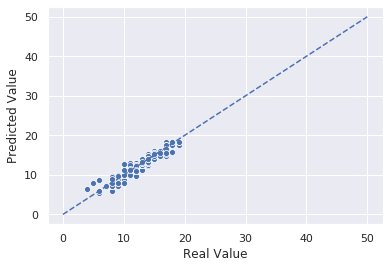

In [48]:
# train GBR with parameters optimized 

clf = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

clf.fit(X_train, y_train)

# Predicting the results for our test dataset
predicted_values = clf.predict(X_test)

print(f"Printing MAE error(avg abs residual): {metrics.mean_absolute_error(y_test, predicted_values)}")
print(f"Printing MSE error: {metrics.mean_squared_error(y_test, predicted_values)}")
print(f"Printing RMSE error: {np.sqrt(metrics.mean_squared_error(y_test, predicted_values))}")
print(f"R2 Score: {metrics.r2_score(y_test, predicted_values)}")

# Plotting differenct between real and predicted values
sns.scatterplot(y_test, predicted_values)
plt.plot([0, 50], [0, 50], '--')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.show()

Text(0, 0.5, 'Deviance')

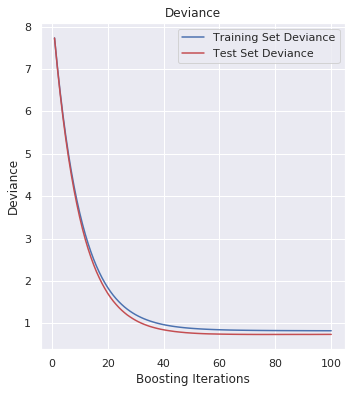

In [49]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((100,), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(100) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(100) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

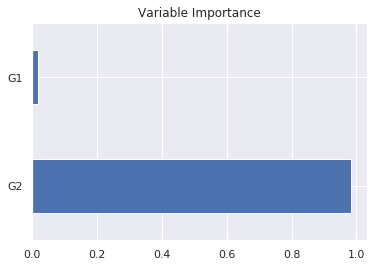

In [50]:
# Plot feature importance
(pd.Series(clf.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 

plt.title('Variable Importance')
plt.show()

### Summary: 

As far as the prediction model is concerned, all the characteristic variables are retained, and the prediction model reached is almost the same as the model that only retain the students' previous test scores (G1 and G2). If one previous score (G1) is removed, the accuracy of the model prediction will be reduced, but if both test scores (G1 and G2) are all removed, the prediction ability of the model will be greatly reduced, and it will not have the value of prediction. From the analysis of the different steps, we conclude:

1. If we collect only students' previous grade (G1 and G2), we can build up a good prediction model to predict students' final grade. 
2. The above conclusion doesn't mean this dataset has no research value. Because from the data visualization, we get a lot of interesting findings. Although these findings are not always to do with academic score, they still show the value of social research: the differences in learning between boys and girls can provide better educational ideas for parents and schools. Maybe boys need more exercise than just extending study time to improve performance. And for boys and girls in different subjects, can schools or families provide different help. For children who do not like to socialize, they can properly develop their social skills, which will help improve their academic performance, but parents and school need to supervise problems such as alcoholism caused by improper socialization, etc.
3. This data set does not find a characteristic variable that really affects students' academic performance. Predicting student next academic score with previous academic is of course the most effective and low-cost method. However, as a more in-depth study of the factors affecting a student's performance, this data did not find the most important characteristic variable.

Suggest: 
Based on the above research analysis, we suggest that in data collection, it should consider the student's 'IQ', 'EQ', or 'Expression ability', etc. These may be important factors that affect a student's academic performance. In the future, We hope to be able to make accurate predictions of their academic performance when there is no grades related information. 


## Machine Learning (Fun Part) 

## 2. Predict if my child has a girlfriend/boyfriend (classcification) 
Students in youth treason, parents sometimes worry very much about their children's early love. The significance of building this predictive model is to help parents judge whether their children have early love in the school. 
0 - No, 1- Yes

### Data preparation (training data & test data) 

In [51]:
# Separating features(X) and target(y)

X = students.drop(['romantic'], axis=1)
y = students['romantic']

# Splitting features and target datasets into: train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Printing original Dataset
print(f"X.shape: {X.shape}, y.shape: {y.shape}")

# Printing splitted datasets
print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

X.shape: (991, 42), y.shape: (991,)
X_train.shape: (693, 42), y_train.shape: (693,)
X_test.shape: (298, 42), y_test.shape: (298,)


In [52]:
# Training a model using multiple differents algorithms and comparing the results
# Cross-validation to get each estimator score

for Model in [LogisticRegression, LinearSVC, neighbors.KNeighborsClassifier, SVC, GradientBoostingClassifier]:
    model = Model()
    model.fit(X_train, y_train)
    predicted_values = model.predict(X_test)
    cv = ShuffleSplit(n_splits=5)
    print(f"{Model.__name__, cross_val_score(Model(), X, y, cv=cv)}")
    print('Classification Report')
    print(classification_report(y_test, predicted_values))


('LogisticRegression', array([0.65, 0.69, 0.66, 0.64, 0.7 ]))
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       195
           1       0.54      0.24      0.34       103

    accuracy                           0.67       298
   macro avg       0.62      0.57      0.56       298
weighted avg       0.64      0.67      0.63       298

('LinearSVC', array([0.64, 0.56, 0.62, 0.6 , 0.48]))
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       195
           1       0.50      0.04      0.07       103

    accuracy                           0.65       298
   macro avg       0.58      0.51      0.43       298
weighted avg       0.60      0.65      0.54       298

('KNeighborsClassifier', array([0.66, 0.62, 0.66, 0.64, 0.64]))
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.79      0.74   

### From above cross validation score, we can see `GradientBoostingClassifier` is the best choice. 

In [53]:
# Tuning the hyper-parameter 

param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 

n_jobs=4

def GradientBooster(param_grid, n_jobs):
    estimator = GradientBoostingClassifier() 
    classifier = GridSearchCV(estimator=estimator, cv=5, param_grid=param_grid, 
    n_jobs=n_jobs)
    classifier.fit(X_train, y_train)
    print(classifier.best_estimator_)
    
GradientBooster(param_grid, n_jobs)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [54]:

clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

clf.fit(X_train, y_train)

# Predicting the results for our test dataset
predicted_values = clf.predict(X_test)
print('Classification Report')
print(classification_report(y_test, predicted_values))
print('Confusion Matrix')
print(confusion_matrix(y_test, predicted_values))


Classification Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       195
           1       0.69      0.64      0.67       103

    accuracy                           0.78       298
   macro avg       0.76      0.75      0.75       298
weighted avg       0.78      0.78      0.78       298

Confusion Matrix
[[166  29]
 [ 37  66]]


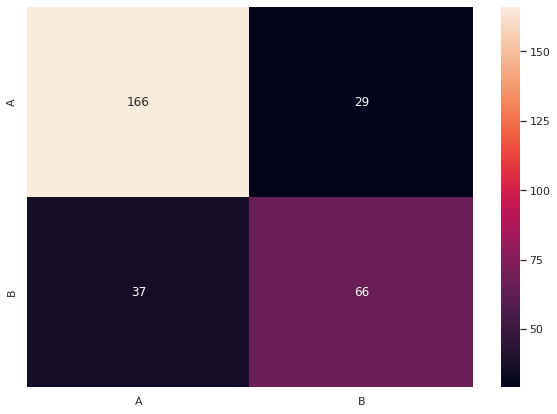

In [56]:
array = [[166, 29], 
          [37, 66]]
df_cm = pd.DataFrame(array, index=[i for i in "AB"], columns=[i for i in "AB"])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

`Although the accuracy of the model is not very high, it can somehow assist parents to prove their guess in a sense as an auxiliary tool.`